In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\Intenships\YBI_internship\Diabetes.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
diabetes       0
dtype: int64

In [5]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df['bmi'] = df['bmi'].replace(0,df['bmi'].mean())
df['insulin'] = df['insulin'].replace(0,df['insulin'].median())
df['age'] = df['age'].replace(0,df['age'].mean())
df['glucose'] = df['glucose'].replace(0,df['glucose'].mean())
df['diastolic'] = df['diastolic'].replace(0,df['diastolic'].mean())

In [7]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

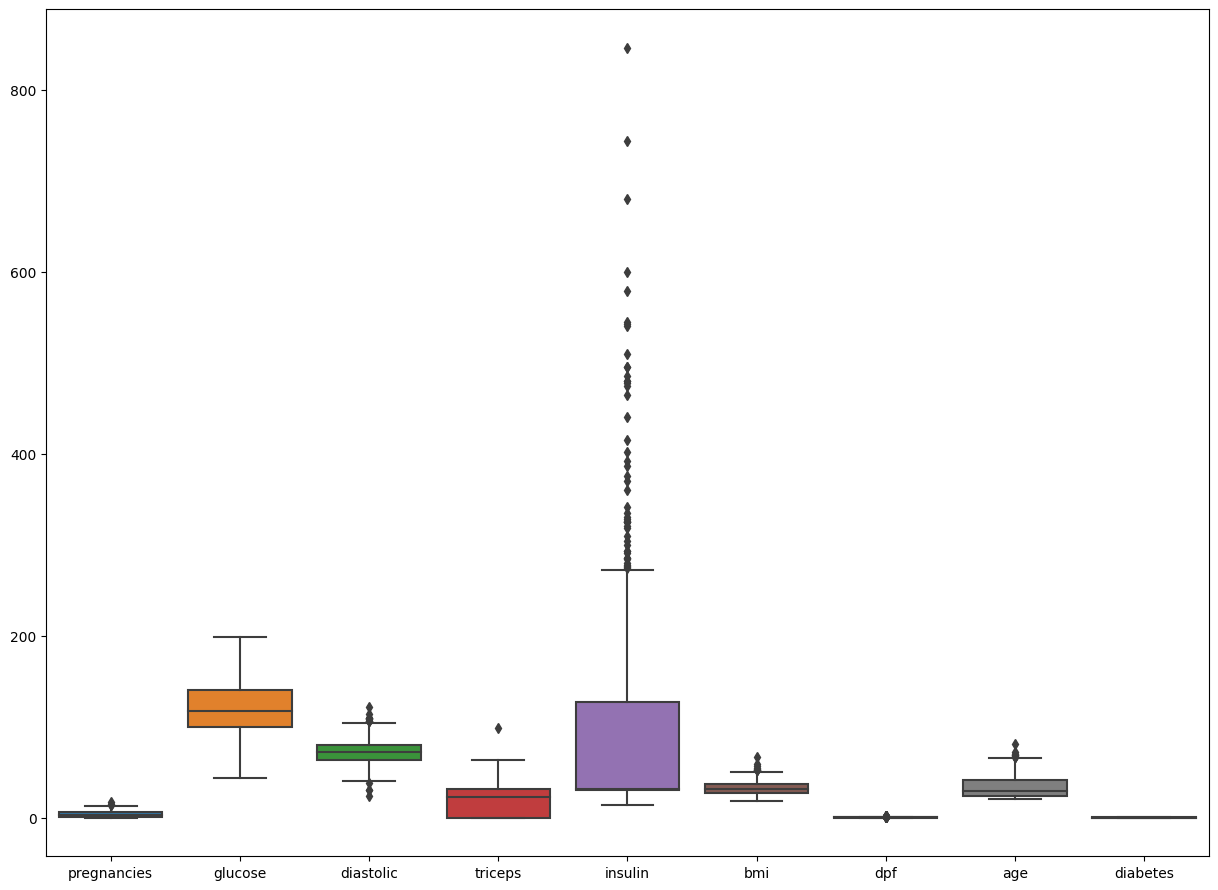

In [8]:
fgr = plt.subplots(figsize = (15,11))
sns.boxplot(df)

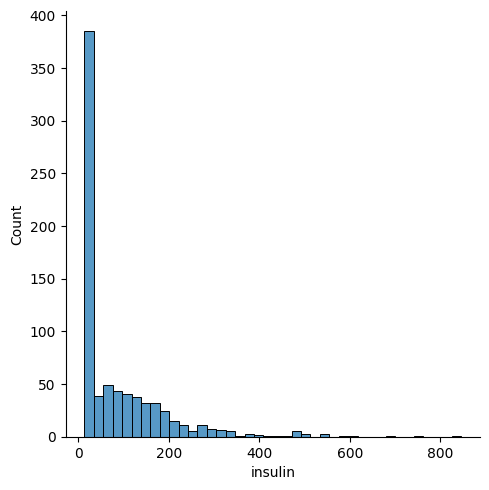

In [9]:
sns.displot(df['insulin'])

In [10]:
q_1 = df['insulin'].quantile(0.25)
q_3 = df['insulin'].quantile(0.75)

In [11]:
iqr_ = q_3 - q_1
iqr_

96.75

In [12]:
lower_ = q_1 - (1.5*iqr_)
upper_ = q_3 + (1.5*iqr_)
upper_,lower_

(272.375, -114.625)

In [13]:
df[(df['insulin']<lower_) | (df['insulin']>upper_)].value_counts().sum()

49

In [14]:
# df['insulin']=np.log(df['insulin'])

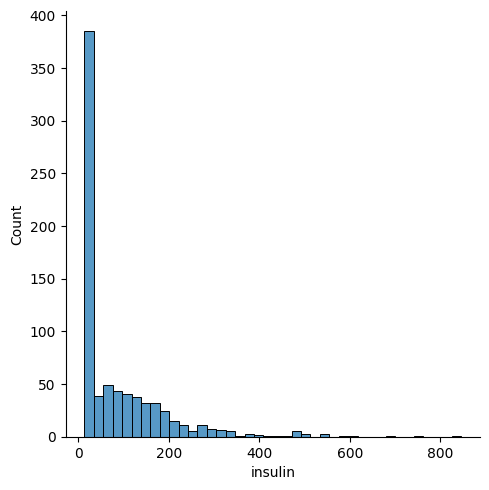

In [15]:
sns.displot(df['insulin'])

In [16]:
# upper_limit = df['insulin'].mean() + 1.99*df['insulin'].std()
# lower_limit = df['insulin'].mean() - 1.99*df['insulin'].std()
# upper_limit,lower_limit

In [17]:
# df[(df['insulin'] > 411.29) | (df['insulin'] < -221.99)]

In [18]:
df['insulin'] = np.where((df['insulin']>upper_),upper_,np.where((df['insulin']<lower_),lower_,df['insulin']))

In [19]:
#df['insulin'] = np.exp(df['insulin'])

In [20]:
df.shape

(768, 9)

In [21]:
df.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,20.536458,86.139811,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,15.952218,76.287377,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,272.375000,67.100000,2.420000,81.000000,1.000000


<Axes: >

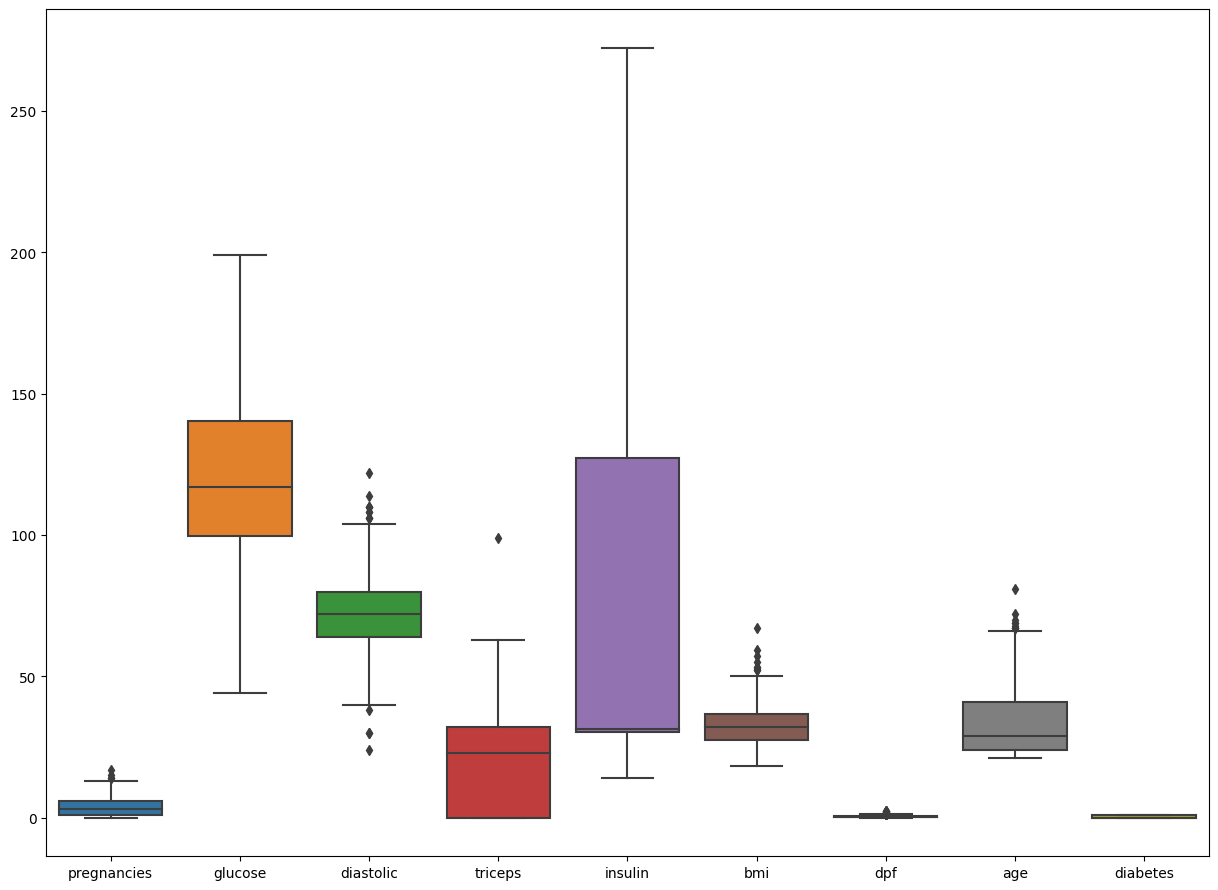

In [22]:
fgr = plt.subplots(figsize = (15,11))
sns.boxplot(df)

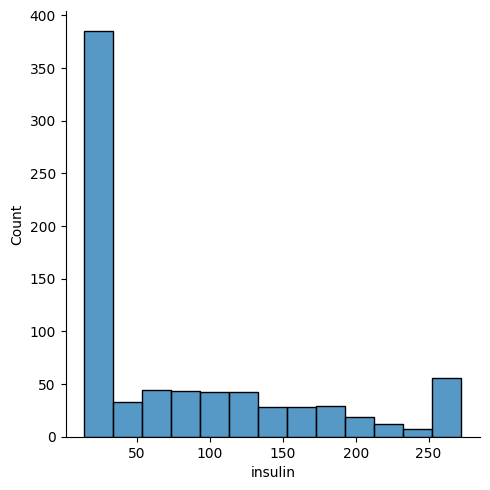

In [23]:
sns.displot(df['insulin'])

In [24]:
q1_a = df['age'].quantile(0.25)
q3_a = df['age'].quantile(0.75)
iqr_a = q3_a - q1_a
iqr_a

17.0

In [25]:
upper_a = q3_a + (1.5 * iqr_a)
lower_a = q1_a - (1.5 * iqr_a)
upper_a,lower_a

(66.5, -1.5)

In [26]:
df[(df['age']<lower_a) | (df['age']>upper_a)]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
123,5,132.0,80.000000,0,30.5,26.800000,0.186,69,0
363,4,146.0,78.000000,0,30.5,38.500000,0.520,67,1
453,2,119.0,69.105469,0,30.5,19.600000,0.832,72,0
459,9,134.0,74.000000,33,60.0,25.900000,0.460,81,0
489,8,194.0,80.000000,0,30.5,26.100000,0.551,67,0
537,0,57.0,60.000000,0,30.5,21.700000,0.735,67,0
666,4,145.0,82.000000,18,30.5,32.500000,0.235,70,1
674,8,91.0,82.000000,0,30.5,35.600000,0.587,68,0
684,5,136.0,82.000000,0,30.5,31.992578,0.640,69,0


In [27]:
df['age'] = np.where((df['age']>upper_a),upper_a,np.where((df['age']<lower_a),lower_a,df['age']))

<Axes: xlabel='age', ylabel='Density'>

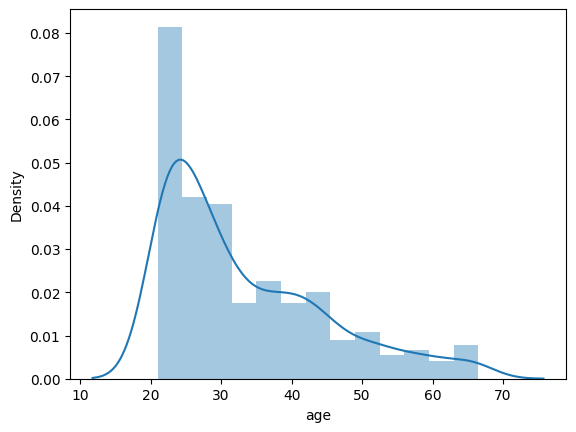

In [28]:
sns.distplot(df['age'], kde = True)

In [29]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35,30.5,33.6,0.627,50.0,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31.0,0
2,8,183.0,64.0,0,30.5,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94.0,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168.0,43.1,2.288,33.0,1


<Axes: xlabel='diastolic', ylabel='Density'>

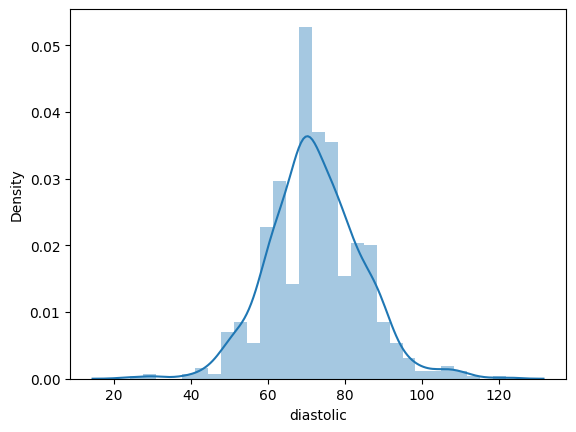

In [30]:
sns.distplot(df['diastolic'],kde = True)

In [31]:
q1_d = df['diastolic'].quantile(0.25)
q3_d = df['diastolic'].quantile(0.75)
iqr_d = q3_d - q1_d
iqr_d

16.0

In [32]:
upper_d = q3_d + (1.5*iqr_d)
lower_d = q1_d - (1.5*iqr_d)
upper_d,lower_d

(104.0, 40.0)

In [33]:
# upper_limit1 = df['diastolic'].mean() + 3*df['diastolic'].std()
# lower_limit1 = df['diastolic'].mean() - 3*df['diastolic'].std()
# upper_limit1,lower_limit1

In [34]:
df[(df['diastolic'] > upper_d) | (df['diastolic'] < lower_d)]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
18,1,103.0,30.0,38,83.0,43.3,0.183,33.0,0
43,9,171.0,110.0,24,240.0,45.4,0.721,54.0,1
84,5,137.0,108.0,0,30.5,48.8,0.227,37.0,1
106,1,96.0,122.0,0,30.5,22.4,0.207,27.0,0
125,1,88.0,30.0,42,99.0,55.0,0.496,26.0,1
177,0,129.0,110.0,46,130.0,67.1,0.319,26.0,1
362,5,103.0,108.0,37,30.5,39.2,0.305,65.0,0
549,4,189.0,110.0,31,30.5,28.5,0.680,37.0,0
597,1,89.0,24.0,19,25.0,27.8,0.559,21.0,0
599,1,109.0,38.0,18,120.0,23.1,0.407,26.0,0


In [35]:
df['diastolic'] = np.where((df['diastolic']>upper_d),upper_d,np.where((df['diastolic']<lower_d),lower_d,df['diastolic']))
# df['age'] =       np.where((df['age']>upper_a),upper_a,np.where((df['age']<lower_a),lower_a,df['age']))

In [36]:
# df_new = df[(df['diastolic'] <= upper_limit1) & (df['diastolic'] >= lower_limit1)]
# df_new.shape

<Axes: >

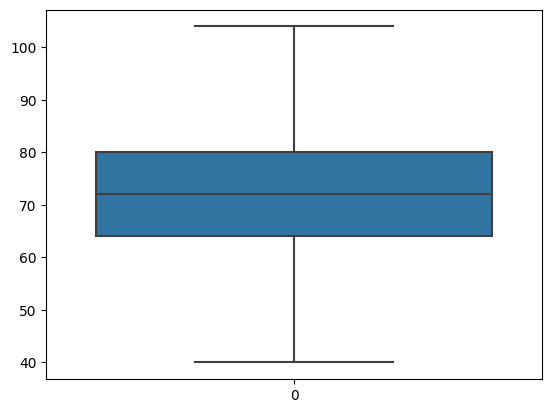

In [37]:
sns.boxplot(df['diastolic'])

<Axes: xlabel='bmi', ylabel='Density'>

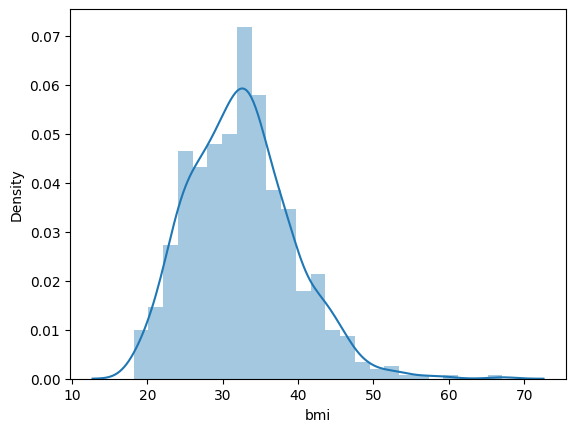

In [38]:
sns.distplot(df['bmi'])

In [39]:
q1_bm = df['bmi'].quantile(0.25)
q3_bm = df['bmi'].quantile(0.75)
iqr_bm = q3_bm - q1_bm

In [40]:
upper_limit2 = q3_bm + (1.5*iqr_bm)
lower_limit2 = q1_bm - (1.5*iqr_bm)
upper_limit2,lower_limit2

(50.25, 13.849999999999998)

In [41]:
df[(df['bmi'] > upper_limit2) | (df['bmi'] < lower_limit2)]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
120,0,162.0,76.000000,56,100.000,53.2,0.759,25.0,1
125,1,88.0,40.000000,42,99.000,55.0,0.496,26.0,1
177,0,129.0,104.000000,46,130.000,67.1,0.319,26.0,1
193,11,135.0,69.105469,0,30.500,52.3,0.578,40.0,1
247,0,165.0,90.000000,33,272.375,52.3,0.427,23.0,0
303,5,115.0,98.000000,0,30.500,52.9,0.209,28.0,1
445,0,180.0,78.000000,63,14.000,59.4,2.420,25.0,1
673,3,123.0,100.000000,35,240.000,57.3,0.880,22.0,0


In [42]:
df['bmi'] = np.where((df['bmi']>upper_limit2),upper_limit2,np.where((df['bmi']<lower_limit2),lower_limit2,df['bmi']))

<Axes: >

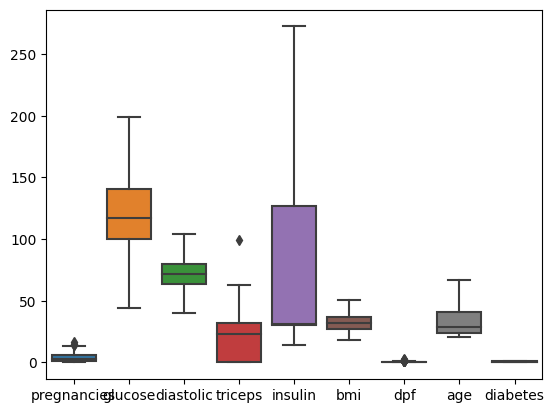

In [43]:
sns.boxplot(df)

<Axes: >

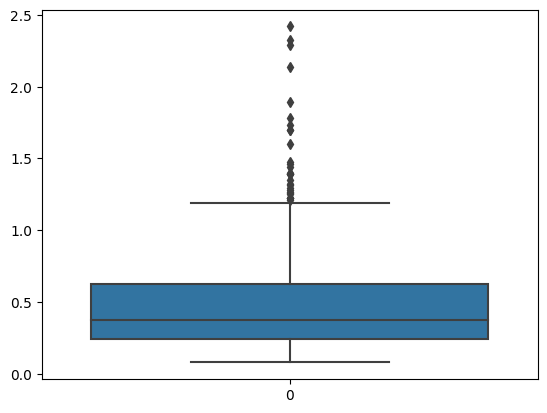

In [44]:
sns.boxplot(df['dpf'])

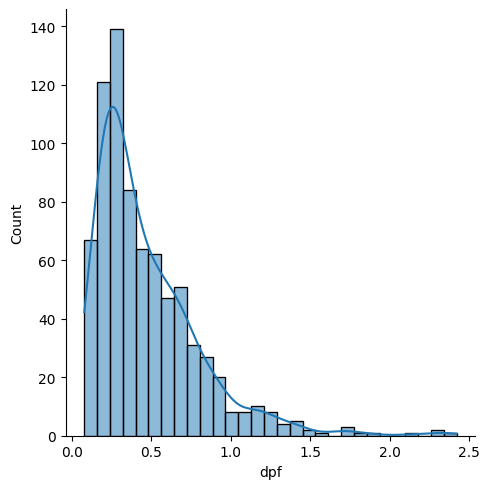

In [45]:
sns.displot(df['dpf'], kde = True)

In [46]:
q1 = df['dpf'].quantile(0.25)
q3 = df['dpf'].quantile(0.75)
q1,q3

(0.24375, 0.62625)

In [47]:
iqr = q3 - q1
iqr

0.38249999999999995

In [48]:
upper_limit3 = q3 + 1.5*iqr
lower_limit3 = q1 - 1.5*iqr
upper_limit3,lower_limit3

(1.2, -0.32999999999999996)

In [49]:
df.head(2)

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148.0,72.0,35,30.5,33.6,0.627,50.0,1
1,1,85.0,66.0,29,30.5,26.6,0.351,31.0,0


In [50]:
df[(df['dpf']>upper_limit3) | (df['dpf']<lower_limit3)]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
4,0,137.0,40.0,35,168.000,43.100000,2.288,33.0,1
12,10,139.0,80.0,0,30.500,27.100000,1.441,57.0,0
39,4,111.0,72.0,47,207.000,37.100000,1.390,56.0,1
45,0,180.0,66.0,39,30.500,42.000000,1.893,25.0,1
58,0,146.0,82.0,0,30.500,40.500000,1.781,44.0,0
100,1,163.0,72.0,0,30.500,39.000000,1.222,33.0,1
147,2,106.0,64.0,35,119.000,30.500000,1.400,34.0,0
187,1,128.0,98.0,41,58.000,32.000000,1.321,33.0,1
218,5,85.0,74.0,22,30.500,29.000000,1.224,32.0,1
228,4,197.0,70.0,39,272.375,36.700000,2.329,31.0,0


In [51]:
df['dpf'] = np.where((df['dpf']>upper_limit3),upper_limit3,np.where((df['dpf']<lower_limit3),lower_limit3,df['dpf']))

<Axes: >

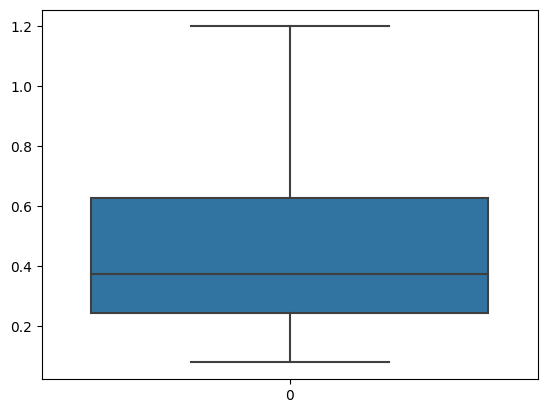

In [52]:
sns.boxplot(df['dpf'])

In [53]:
# sns.displot(df_new['dpf'])

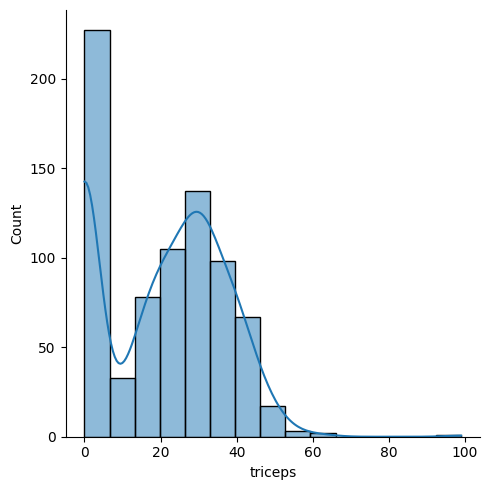

In [54]:
sns.displot(df['triceps'],kde = True)

In [55]:
Q1_t = df['triceps'].quantile(0.25)
Q3_t = df['triceps'].quantile(0.75)
Q1_t,Q3_t

(0.0, 32.0)

In [56]:
IQR = Q3_t-Q1_t

In [57]:
upper_limit4 = Q3_t+1.5*IQR
lower_limit4 = Q1_t-1.5*IQR
upper_limit4,lower_limit4

(80.0, -48.0)

In [58]:
df['triceps'] = np.where((df['triceps']>upper_limit4),upper_limit4,np.where((df['triceps']<lower_limit4),lower_limit4,df['triceps']))

<Axes: >

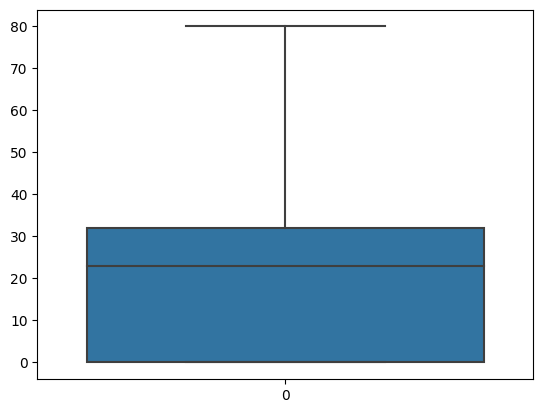

In [59]:
sns.boxplot(df['triceps'])

In [60]:
q1_pre = df['pregnancies'].quantile(0.25)
q3_pre = df['pregnancies'].quantile(0.75)
iqr_pre = q3_pre - q1_pre
iqr_pre

5.0

In [61]:
upper_pre = q3 + (1.5*iqr_pre)
lower_pre = q1 - (1.5*iqr_pre)
upper_pre,lower_pre

(8.12625, -7.25625)

In [62]:
df[(df['pregnancies']>upper_pre)  | (df['pregnancies']<lower_pre)]


,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
7,10,115.0,69.105469,0.0,30.5,35.3,0.134,29.0,0
11,10,168.0,74.000000,0.0,30.5,38.0,0.537,34.0,1
12,10,139.0,80.000000,0.0,30.5,27.1,1.200,57.0,0
23,9,119.0,80.000000,35.0,30.5,29.0,0.263,29.0,1
24,11,143.0,94.000000,33.0,146.0,36.6,0.254,51.0,1
...,...,...,...,...,...,...,...,...,...
744,13,153.0,88.000000,37.0,140.0,40.6,1.174,39.0,0
745,12,100.0,84.000000,33.0,105.0,30.0,0.488,46.0,0
761,9,170.0,74.000000,31.0,30.5,44.0,0.403,43.0,1
762,9,89.0,62.000000,0.0,30.5,22.5,0.142,33.0,0


In [63]:
df['pregnancies'] = np.where((df['pregnancies']>upper_pre),upper_pre,np.where((df['pregnancies']<lower_pre),lower_pre,df['pregnancies']))

<Axes: >

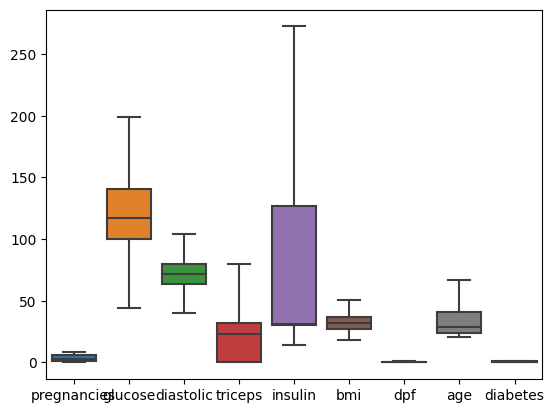

In [64]:
sns.boxplot(df)

In [65]:
df.columns

Index(['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age', 'diabetes'],
      dtype='object')

In [66]:
x = df[['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi',
       'dpf', 'age']]
y = df['diabetes']

In [67]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x=scaler.fit_transform(x)

<Axes: >

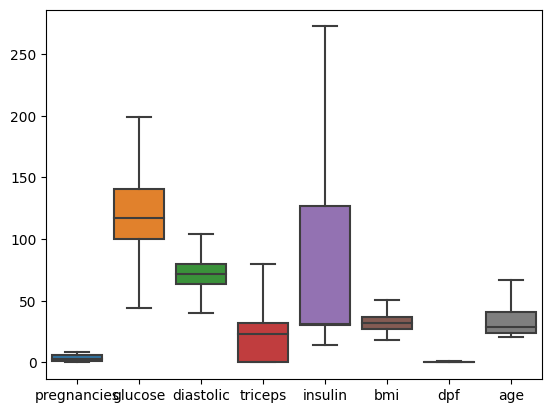

In [68]:
sns.boxplot(x)

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 121,train_size=0.8)

In [70]:
from sklearn.ensemble import RandomForestClassifier
dt = RandomForestClassifier()
parameter = {
    'n_estimators' : [80,90,100,110],
    'criterion' : ['gini','entropy','log_loss'],
    #'splitter':['best','random'],
    'max_depth':[6,7,8,9,10,11],
    'max_features':['auto','sqrt','log2']
}

In [74]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(dt,param_grid= parameter,cv = 5,scoring = 'accuracy',verbose=3)

In [72]:
#model.best_params_

In [ ]:
model.fit(x_train,y_train)

In [76]:
y_pred_tree = model.predict(x_test)

In [77]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [78]:
model.best_params_

{'criterion': 'log_loss',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 80}

In [79]:
from sklearn.metrics import classification_report
print(accuracy_score(y_test,y_pred_tree))
print(confusion_matrix(y_test,y_pred_tree))
print(classification_report(y_test,y_pred_tree))

0.8506493506493507
[[95  5]
 [18 36]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       100
           1       0.88      0.67      0.76        54

    accuracy                           0.85       154
   macro avg       0.86      0.81      0.82       154
weighted avg       0.85      0.85      0.84       154

